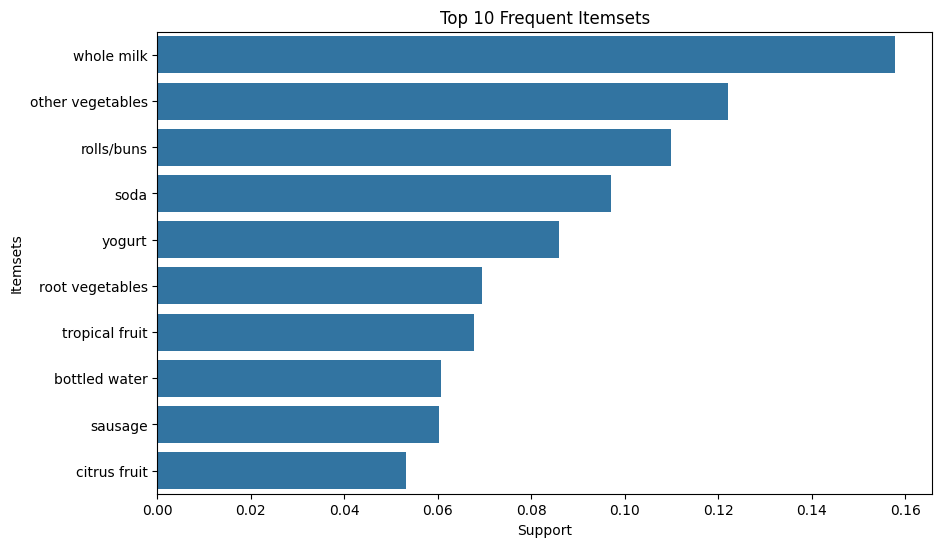

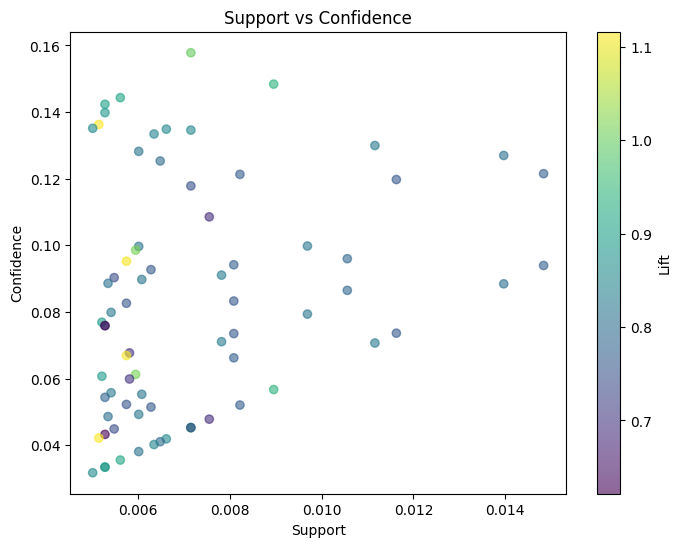

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load dataset
df = pd.read_csv(r"C:\Users\mukke\OneDrive\Desktop\git\PRODIGY_DS_05\Groceries_dataset.csv")

# Group transactions
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

# One-hot encode items
te = TransactionEncoder()
te_ary = te.fit(basket['itemDescription']).transform(basket['itemDescription'])
basket_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori with lower support threshold
frequent_itemsets = apriori(basket_encoded, min_support=0.005, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)

# Create a clean label for plotting without affecting frozenset
frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Generate rules (keep frozenset intact here)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules = rules.sort_values(by=["confidence", "lift"], ascending=False)

# Plot top 10 frequent itemsets
plt.figure(figsize=(10,6))
sns.barplot(x="support", y="itemsets_str", data=frequent_itemsets.head(10))
plt.title("Top 10 Frequent Itemsets")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

# Plot Support vs Confidence if rules exist
if not rules.empty:
    plt.figure(figsize=(8,6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis')
    plt.colorbar(label='Lift')
    plt.title("Support vs Confidence")
    plt.xlabel("Support")
    plt.ylabel("Confidence")
    plt.show()
else:
    print("No rules found with current thresholds.")

# Save rules
rules.to_csv("association_rules.csv", index=False)
